In [43]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm

import xtrack as xt
import xobjects as xo
import xpart as xp


beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


current=2.4
length = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
magnetic_field = 0.060 # T for AD
B_ratio=1e-10



c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



circumference = 182.43280000000 #m
T = circumference/(c*beta_rel)
s_per_turn = T


beta_x=10 
beta_y=4

#disp_x=0.12
disp_x=0

arc=dtk.elements.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0)
                                        
          

In [44]:
#dispersion and space charge parabola

dtk_cooler = dtk.elements.ElectronCooler(current=current,length=length,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         magnetic_field=magnetic_field,B_ratio=B_ratio,
                                         Neutralisation_space_charge=1,Neutralisation_rotation=0)      


r=np.arange(start=-50*1e-2, stop=50*1e-2, step=1e-3)

#beta_diff=dtk_cooler.radial_velocity_dependence(gamma,r,current,beta_rel,r_beam)   
# beta2=beta_diff+beta_rel

dE_E = (1.2e-4*current/(beta_rel**3))*(r/r_beam)**2


E = dtk_cooler.beta_to_kinetic_energy(beta_rel, dtk_cooler.me_ev)# + Pb_m0_MeV_c2 #Mev/c^2
E_diff = dE_E*E
E_tot = E + E_diff
beta2=dtk_cooler.kinetic_energy_to_beta(E_tot, dtk_cooler.me_ev)
#beta_ratio = beta2/beta
beta_diff = beta2-beta_rel

p0 = beta_rel*dtk_cooler.me_ev*gamma
p2 = beta2*dtk_cooler.me_ev*gamma

dp_p=(p2-p0)/p0                                         

In [45]:
#Alternative electron beam profile:
import numpy as np

#re = 2.8179403267e-15  # Classical electron radius in meters
#qe = 1.60217662e-19     # Elementary charge in Coulombs
#clight = 2.998e8        # Speed of light in meters per second
r = np.arange(start=-50e-2, stop=50e-2, step=1e-3)  # Example values for r

beta0=beta_rel
gamma0= gamma
me_ev=dtk_cooler.me_ev

#A = re / (qe * clight) * (gamma0 + 1) / (gamma0 * gamma0)
A = 1.2e-4
dE_E = (A * current / (beta0 * beta0 * beta0)) * np.power((r / r_beam), 2)
E = (gamma0 - 1) * me_ev
E_diff = dE_E * E
E_tot = E + E_diff
gamma = 1 + (E_tot / me_ev)
beta2 = np.sqrt(1 - 1 / (gamma * gamma))
beta_diff2 = beta2 - beta0

#print('beta_diff:',beta_diff)
#print('beta_diff2:',beta_diff2)

# Assert that beta_diff and beta_diff2 are numerically close within a tolerance
tolerance = 1e-10  # Specify tolerance for comparison
#assert np.allclose(beta_diff, beta_diff2, rtol=tolerance, atol=tolerance), "beta_diff and beta_diff2 are not equal"


Parameters: $I=2.4 A, B=0.060 T, \beta_x=10 m,\beta_y=4,D_x=0.12 m T_\perp=100meV,T_\parallel=1meV,\epsilon_{x}=35*1e-6,\epsilon_{y}=35*1e-6,dp/p=1e-3$

In [46]:
num_particles=100000
#old
emittance=35*1e-6 #inital emittance
emittance=5*1e-6 #inital emittance

sigma_x = np.sqrt(beta_x*emittance)
sigma_px = np.sqrt(emittance*1/beta_x)
sigma_y = np.sqrt(beta_y*emittance)
sigma_py = np.sqrt(emittance*1/beta_y)
sigma_p = 5e-4



delta = np.random.normal(loc=0.0, scale=sigma_p,  size=num_particles)
x =     np.random.normal(loc=0.0, scale=sigma_x,  size=num_particles)+disp_x*delta
px =    np.random.normal(loc=0.0, scale=sigma_px, size=num_particles)
y =     np.random.normal(loc=0.0, scale=sigma_y,  size=num_particles)
py =    np.random.normal(loc=0.0, scale=sigma_py, size=num_particles)

# #2_sigma
# emittance_x_2sigma=35*1e-6 #inital emittance
# x_2sigma=np.sqrt(beta_x*emittance_x_2sigma)
# x_2sigma_beam=np.random.normal(loc=0.0, scale=x_2sigma,  size=num_particles)

# delta_2sigma=1e-3
# delta_2sigma_beam=np.random.normal(loc=0.0, scale=delta_2sigma,  size=num_particles)

dtk_particles = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=x,
        px=px,
        y=y,
        py=py,
        delta=delta,
        zeta=0)

offset_x=10e-3
offset_px=1e-3
offset_y=10e-3
offset_py=1e-3
offset_energy=5e-4

cooler = xt.ElectronCooler(current=current,length=2.5,r_beam=25*1e-3,
                                         T_perp=0.1,T_l=0.01,
                                         magnetic_field=0.075,B_ratio=1e-10,
                                         Neutralisation_space_charge=0,
                                         Neutralisation_rotation=0,
                                         offset_x=0,offset_px=0,
                                         offset_y=0,offset_py=0,
                                         offset_energy=0)



cooler = dtk.elements.ElectronCooler(current=current,length=length,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         magnetic_field=magnetic_field,B_ratio=B_ratio,
                                         Neutralisation_space_charge=0,
                                         Neutralisation_rotation=0,
                                         offset_x=offset_x,offset_px=offset_px,
                                         offset_y=offset_y,offset_py=offset_py,
                                         offset_energy=offset_energy)


num_turns=int(1*1e0)


# initialize arrays
x, px, delta, action_x = [], [], [], []
file_index=0

import shutil
import os

# Change back directory to the old folder
os.chdir('/home/pkruyt/cernbox/electron_cooling/notebooks_xsuite/AD300')


if os.path.exists("output"):
    shutil.rmtree("output")  # delete the entire directory and its contents
os.makedirs("output")  # create a new empty directory
os.makedirs("output/data")  # create a new empty directory



# loop over turns
for i in tqdm(range(num_turns)):
    
    x.append(dtk_particles.x.copy())
    px.append(dtk_particles.px.copy())
    delta.append(dtk_particles.delta.copy())
    
    # x.append(particles.x)
    # px.append(particles.px)
    # delta.append(particles.delta)


    # calculate action in horizontal plane
    action_x_temp = (dtk_particles.x**2/beta_x + beta_x*dtk_particles.px**2)
    action_x.append(action_x_temp)

   
       

    # track particle
    force=cooler.force(dtk_particles)
    arc.track(dtk_particles)
    cooler.track(dtk_particles)
    
    


#time = np.arange(0, num_turns, step) * s_per_turn   



100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


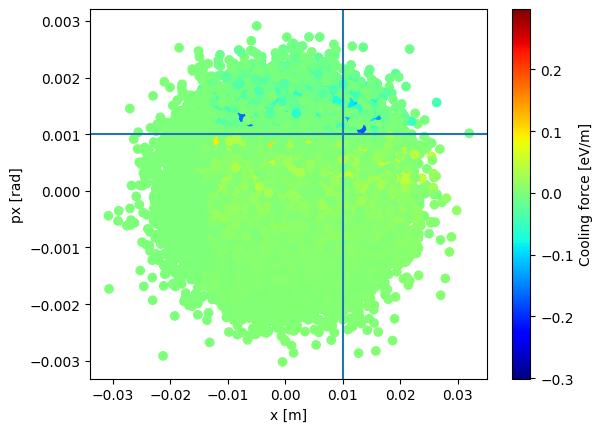

In [47]:
#plot force magnitude in phase space
force_x,force_y,force_l=force

plt.figure()
plt.scatter(x,px,c=force_x,cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('px [rad]')
#plt.title(f'AD (300 MeV): TL={T_l}eV T_TR={T_perp}eV')
plt.colorbar().set_label("Cooling force [eV/m]")
plt.axvline(offset_x,label='offset x')
plt.axhline(offset_px,label='offest px')
plt.show()

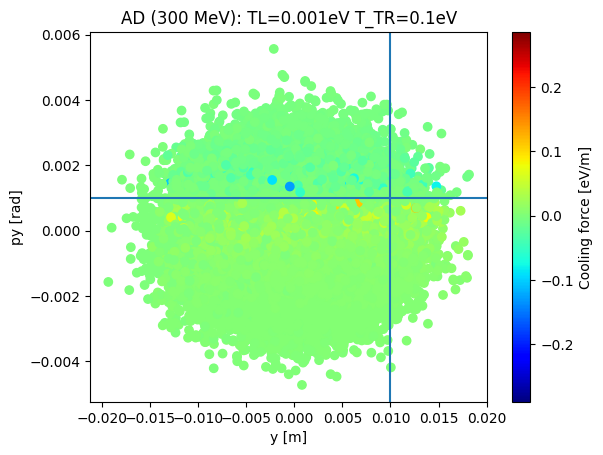

In [48]:
#plot force magnitude in phase space
force_x,force_y,force_l=force

plt.figure()
plt.scatter(y,py,c=force_y,cmap='jet')
plt.xlabel('y [m]')
plt.ylabel('py [rad]')
plt.title(f'AD (300 MeV): TL={T_l}eV T_TR={T_perp}eV')
plt.colorbar().set_label("Cooling force [eV/m]")
plt.axvline(offset_y,label='offset x')
plt.axhline(offset_py,label='offest px')
plt.show()

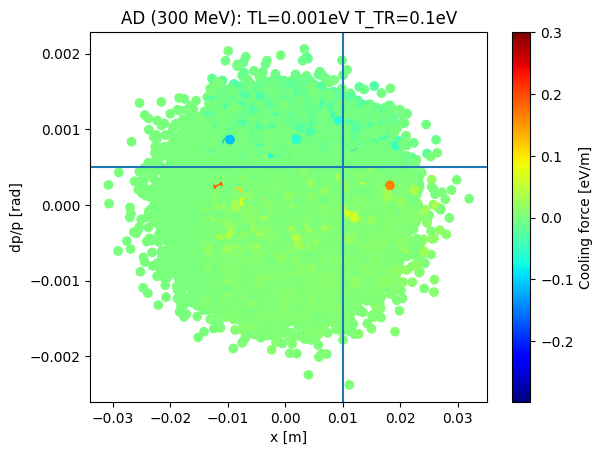

In [49]:
#plot force magnitude in phase space
force_x,force_y,force_l=force

plt.figure()
plt.scatter(x,delta,c=force_l,cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('dp/p [rad]')
#plt.title(f'AD (300 MeV): TL={T_l}eV T_TR={T_perp}eV')
plt.colorbar().set_label("Cooling force [eV/m]")
plt.axvline(offset_x,label='offset x')
plt.axhline(offset_energy,label='offest dp')
plt.show()